In [2]:
import pandas as pd

data = pd.read_csv("kmediod.csv")
print(data)

    x  y
0   8  7
1   3  7
2   4  9
3   9  6
4   8  5
5   5  8
6   7  3
7   8  4
8   7  3
9   8  4
10  7  5
11  4  5


In [5]:
!pip install scikit-learn-extra

In [7]:
from sklearn_extra.cluster import KMedoids

kmediods = KMedoids(n_clusters=2, random_state=0).fit(data)

kmediods.cluster_centers_

array([[3., 7.],
       [8., 4.]])

In [8]:
kmediods.labels_

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [11]:
data['labels'] = kmediods.labels_
print(data)

    x  y  labels
0   8  7       1
1   3  7       0
2   4  9       0
3   9  6       1
4   8  5       1
5   5  8       0
6   7  3       1
7   8  4       1
8   7  3       1
9   8  4       1
10  7  5       1
11  4  5       0


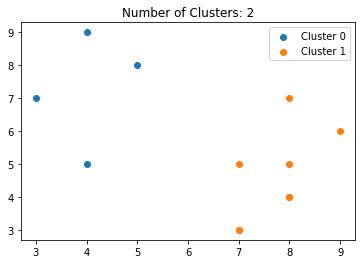

In [14]:
import matplotlib.pyplot as plt

label_set = list(set(data['labels']))
n_clusters_ = len(set(kmediods.labels_))

for label in label_set:
    Xclass = data[data['labels'] == label]
    
    if(label == -1):
        plt.scatter(Xclass['x'], Xclass['y'], c='red', label='Outliers')
    else:
        plt.scatter(Xclass['x'], Xclass['y'], label='Cluster '+str(label))
        
plt.title("Number of Clusters: " + str(n_clusters_))
plt.legend()